In [ ]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot
import numpy as np

Using TensorFlow backend.


In [2]:
df = utils.get_dataset()

In [3]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [4]:
df = preprocessing.impute_income_KNN(df)

In [5]:
df = df.drop(["Kidhome","Teenhome"], axis=1)

In [6]:
df.head()

,Year_Birth,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,2,58138.0,663,58,635,88,546,172,88,...,0,1,0,0,0,0,1,0,0,0
1,1954,2,46344.0,113,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,2,71613.0,312,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,2,26646.0,139,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,4,58293.0,161,94,173,43,118,46,27,...,0,0,0,0,0,1,0,0,0,0


In [7]:
len(df.columns) -1

30

In [8]:
seed = 0

In [9]:
# perform the train, test split
X_train, X_test, y_train, y_test = utils.data_split(df, test_size=0.2, random_state=seed)

In [10]:
X_train, X_test = preprocessing.Min_Max_Train(X_train, X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### a list of available initializations:
    
    * uniform
    * lecun_uniform: Uniform initialization scaled by the square root of the number of inputs (LeCun 98).
    normal
    * identity: Use with square 2D layers (shape[0] == shape[1]).
    * orthogonal: Use with square 2D layers (shape[0] == shape[1]).
    * zero
    * one
    * glorot_normal: Gaussian initialization scaled by fan_in + fan_out (Glorot 2010)
    * glorot_uniform
    * he_normal: Gaussian initialization scaled by fan_in (He et al., 2014)
    * he_uniform
    
####  a list of available optimizers:

    * adam
    * sgd
    * adagrad
    * adadelta
    * nadam
    * rmsprop
    * adamax
    
#### a list of available loss functions:

    * binary_crossentropy
    * mean_squared_error
    * categorical_hinge
    * kld
    
    



In [23]:
model = KerasNN(X_train, X_test, y_train, y_test, input_dim=30,init="he_normal")

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


Accuracy 0.88
Area under the curve 0.80
Precision 0.66
Recall 0.68
Profit Share 0.55


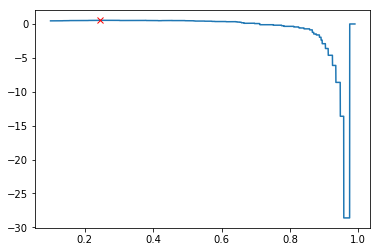

In [24]:
utils.NN_evaluation(model, X_test, y_test)

## Oversampling on NN

In [25]:
from imblearn import over_sampling

In [26]:
ros = over_sampling.RandomOverSampler(random_state=seed, ratio=0.5)
resamp_x, resamp_y= ros.fit_resample(X_train, y_train)

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


Accuracy 0.90
Area under the curve 0.84
Precision 0.59
Recall 0.77
Profit Share 0.57


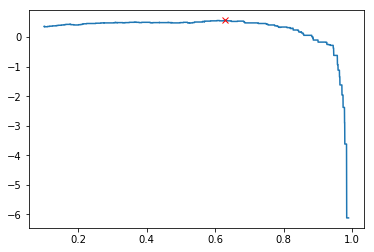

In [27]:
oversampling_model = KerasNN(resamp_x, X_test, resamp_y, y_test, input_dim=30,init="he_normal")

utils.NN_evaluation(oversampling_model, X_test, y_test)

In [28]:
ada = over_sampling.ADASYN(random_state=seed, ratio=0.7)
resamp_x, resamp_y= ada.fit_resample(X_train, y_train)

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


Accuracy 0.89
Area under the curve 0.81
Precision 0.62
Recall 0.70
Profit Share 0.55


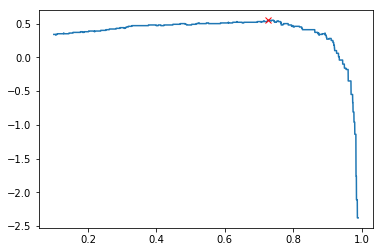

In [29]:
oversampling_model = KerasNN(resamp_x, X_test, resamp_y, y_test, input_dim=30,init="he_normal")

utils.NN_evaluation(oversampling_model, X_test, y_test)

In [30]:
smo = over_sampling.SMOTE(random_state=seed, ratio=0.5)
resamp_x, resamp_y= smo.fit_resample(X_train, y_train)

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


Accuracy 0.89
Area under the curve 0.81
Precision 0.65
Recall 0.70
Profit Share 0.56


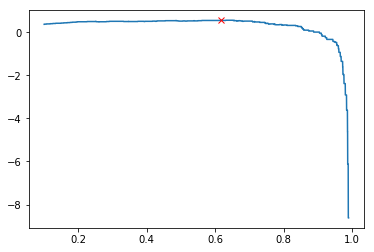

In [31]:
oversampling_model = KerasNN(resamp_x, X_test, resamp_y, y_test, input_dim=30,init="he_normal")

utils.NN_evaluation(oversampling_model, X_test, y_test)

## Undersampling on NN

In [32]:
from imblearn import under_sampling

In [33]:
rus = under_sampling.RandomUnderSampler(random_state=seed)
resamp_x, resamp_y= rus.fit_resample(X_train, y_train)

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


Accuracy 0.89
Area under the curve 0.82
Precision 0.61
Recall 0.73
Profit Share 0.56


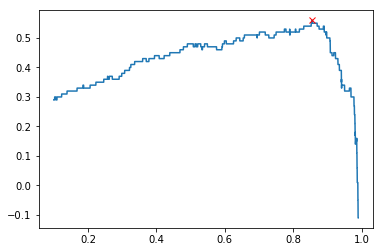

In [34]:
oversampling_model = KerasNN(resamp_x, X_test, resamp_y, y_test, input_dim=30,init="he_normal")

utils.NN_evaluation(oversampling_model, X_test, y_test)

In [35]:
tom = under_sampling.TomekLinks(random_state=seed)
resamp_x, resamp_y= tom.fit_resample(X_train, y_train)

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


Accuracy 0.89
Area under the curve 0.81
Precision 0.62
Recall 0.70
Profit Share 0.55


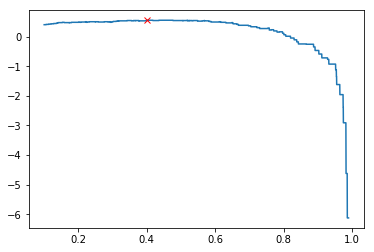

In [36]:
oversampling_model = KerasNN(resamp_x, X_test, resamp_y, y_test, input_dim=30,init="he_normal")

utils.NN_evaluation(oversampling_model, X_test, y_test)

In [37]:
aknn = under_sampling.AllKNN(random_state=seed, n_neighbors=5)
resamp_x, resamp_y= aknn.fit_resample(X_train, y_train)

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


Accuracy 0.86
Area under the curve 0.76
Precision 0.66
Recall 0.59
Profit Share 0.48


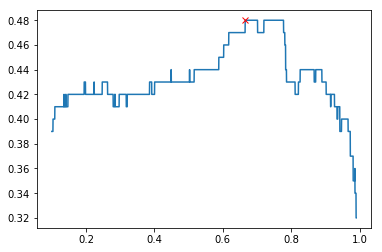

In [38]:
oversampling_model = KerasNN(resamp_x, X_test, resamp_y, y_test, input_dim=30,init="he_normal")

utils.NN_evaluation(oversampling_model, X_test, y_test)

In [39]:
enn = under_sampling.EditedNearestNeighbours(random_state=seed, n_neighbors=3)
resamp_x, resamp_y= enn.fit_resample(X_train, y_train)

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


Accuracy 0.89
Area under the curve 0.82
Precision 0.61
Recall 0.73
Profit Share 0.56


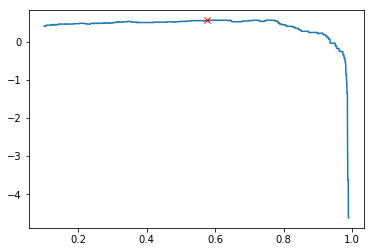

In [40]:
oversampling_model = KerasNN(resamp_x, X_test, resamp_y, y_test, input_dim=30,init="he_normal")

utils.NN_evaluation(oversampling_model, X_test, y_test)

## Combined Methods

In [41]:
from imblearn import combine

In [42]:
smotom = combine.SMOTETomek(random_state=seed, ratio=0.8)
resamp_x, resamp_y= smotom.fit_resample(X_train, y_train)

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


Accuracy 0.89
Area under the curve 0.81
Precision 0.62
Recall 0.70
Profit Share 0.55


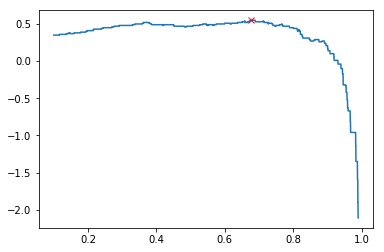

In [43]:
oversampling_model = KerasNN(resamp_x, X_test, resamp_y, y_test, input_dim=30,init="he_normal")

utils.NN_evaluation(oversampling_model, X_test, y_test)

In [44]:
smotenn = combine.SMOTEENN(random_state=seed, ratio=0.8)
resamp_x, resamp_y= smotenn.fit_resample(X_train, y_train)

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


Accuracy 0.88
Area under the curve 0.80
Precision 0.71
Recall 0.66
Profit Share 0.56


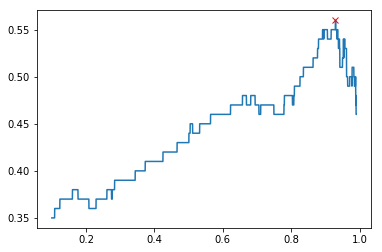

In [45]:
oversampling_model = KerasNN(resamp_x, X_test, resamp_y, y_test, input_dim=30,init="he_normal")

utils.NN_evaluation(oversampling_model, X_test, y_test)

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def Gaussian_NB(X_train, X_test, y_train, y_test):
    scaler = MinMaxScaler()
    # Only fit the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    
    print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
    print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
    print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
    print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
    print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))
    return utils.profit_share(y_pred, y_test)

In [ ]:
def Multinomial_NB(X_train, X_test, y_train, y_test):
    scaler = MinMaxScaler()
    # Only fit the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)
    return utils.profit_share(y_pred, y_test)
    return mnb

In [ ]:
def Complement_NB(X_train, X_test, y_train, y_test):
    cnb = ComplementNB()
    cnb.
    cnb.fit(X_train, y_train)
    y_pred = cnb.predict(X_test)
    return utils.profit_share(y_pred, y_test)

In [ ]:
def Bernoulli_NB(X_train, X_test, y_train, y_test):
    scaler = MinMaxScaler()
    # Only fit the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    bnb = BernoulliNB()
    bnb.fit(X_train, y_train)
    y_pred = bnb.predict(X_test)
    return utils.profit_share(y_pred, y_test)